In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"
weather2020 = pd.read_csv(link)

In [ ]:
weather2020.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,1029,85.750,11,10,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,1029,95.125,12,9,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,1032,77.000,12,10,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,1038,12.375,9,6,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,1038,18.625,9,5,3,116,116,116,0,1,8.7,very bad,1,5


In [ ]:
weather2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

- Charge le dataset et mène une analyse exploratoire : le nombre de features, les corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...
- Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode .select_dtypes(include='number') pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.
- Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans `X_scaled, qui doit également avoir 366 lignes et 22 colonnes.
- Instancie un objet pca, et entraine-le sur tes données standardisées.
- Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?
- Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION. Tu devrais obtenir un graphique de ce type :

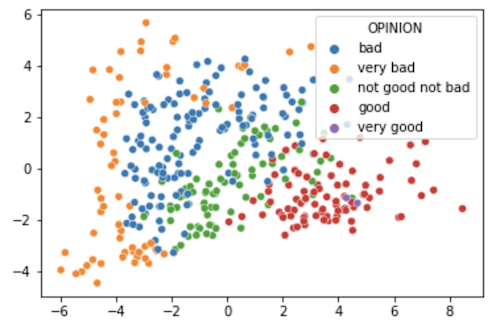
- Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?
 

Charge le dataset et mène une analyse exploratoire : le nombre de features, les 
corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...

In [ ]:
# Nombre de features :

weather2020.shape

(366, 24)

In [ ]:
# Indicateurs de position (mode ; médiane ; quartile) et dispersion (étendue ; intervalle interquartile ; variance ; écart-type)

weather2020.describe() # donne la plupart de ces infos

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,50.017760,17.311475,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,28.935057,6.688467,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,0.000000,5.000000,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,24.750000,12.000000,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,53.937500,16.000000,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,74.000000,23.000000,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,100.000000,38.000000,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


In [ ]:
# Calcul de la médiane de chaque colonne (non renseigné dans describe)

median = weather2020.median()

In [ ]:
median

MAX_TEMPERATURE_C           16.0000
MIN_TEMPERATURE_C           11.0000
WINDSPEED_MAX_KMH           20.0000
TEMPERATURE_MORNING_C       11.0000
TEMPERATURE_NOON_C          15.0000
TEMPERATURE_EVENING_C       14.0000
PRECIP_TOTAL_DAY_MM          0.4000
HUMIDITY_MAX_PERCENT        88.5000
VISIBILITY_AVG_KM            9.8750
PRESSURE_MAX_MB           1020.0000
CLOUDCOVER_AVG_PERCENT      53.9375
HEATINDEX_MAX_C             16.0000
DEWPOINT_MAX_C              12.0000
WINDTEMP_MAX_C              10.0000
WEATHER_CODE_MORNING       119.0000
WEATHER_CODE_NOON          116.0000
WEATHER_CODE_EVENING       122.0000
TOTAL_SNOW_MM                0.0000
UV_INDEX                     4.0000
SUNHOUR                      9.1000
MONTH                        7.0000
DAY                         16.0000
dtype: float64

In [ ]:
# Corrélations :

# weather2020.corr()

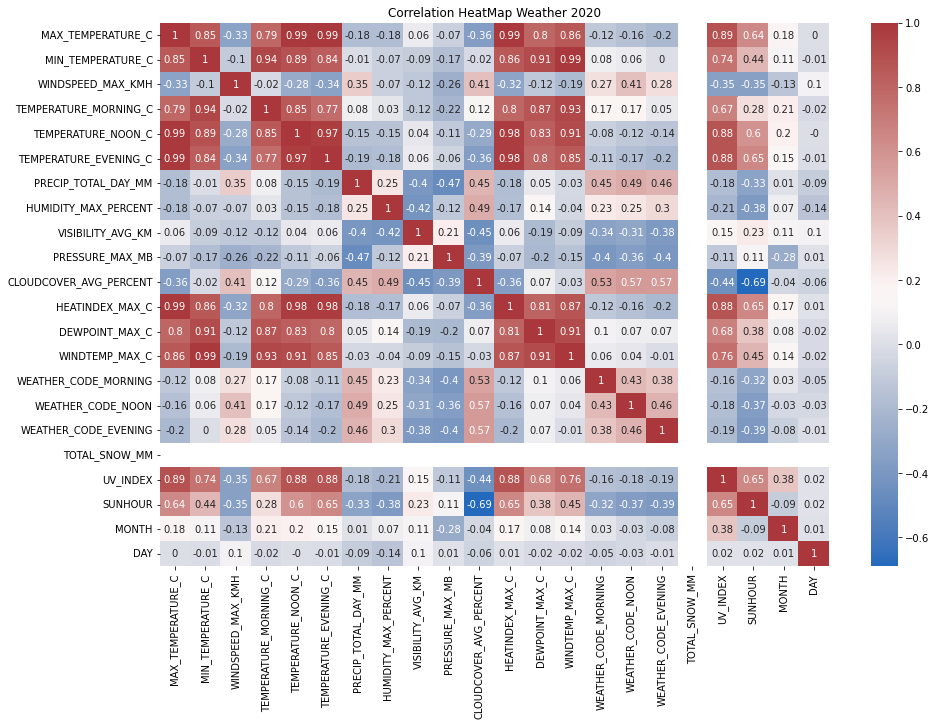

In [ ]:
# Graphique de corrélations :

plt.figure(figsize = (15, 10))
sns.heatmap(round(weather2020.corr(), 2), annot = True, cmap = "vlag")
plt.title("Correlation HeatMap Weather 2020")

plt.show()

In [ ]:
# Pairplot :

# sns.pairplot(data = weather2020, hue = 'OPINION', corner = True)

# plt.show()

Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode .select_dtypes(include='number') pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.

In [ ]:
X = weather2020.select_dtypes('number')
y = weather2020['OPINION']

In [ ]:
X.shape # 366 lignes et 22 colonnes --> ok

(366, 22)

Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans `X_scaled, qui doit également avoir 366 lignes et 22 colonnes.

In [ ]:
# Standardisation : 

scaler = StandardScaler().fit(X, y)

# Transformation :
X_scaled = scaler.transform(X)

In [ ]:
X_scaled.shape # 366 lignes et 22 colonnes --> ok

(366, 22)

Instancie un objet pca, et entraine-le sur tes données standardisées.

In [ ]:
# Entrainement du modèle PCA et création du dataset (avec moins de dimensions) :

# pca = PCA(n_components = 2)
# X_pca = pca.fit_transform(X_scaled)


In [ ]:
# X_pca.shape

In [ ]:
# Méthode 2: variance expliquée

pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [ ]:
X_pca.shape

(366, 22)

Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_.

In [ ]:
explained_variance = pca.explained_variance_ratio_ 

In [ ]:
explained_variance = pd.DataFrame(explained_variance)

In [ ]:
explained_variance.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.409974,0.208764,0.064485,0.059628,0.045772,0.039095,0.029673,0.027996,0.025011,0.02238,0.02061,0.017209,0.010692,0.005507,0.00524,0.003808,0.002246,0.000792,0.000545,0.000409,0.000167,5.241099e-36


In [ ]:
pca = PCA(n_components = 0.7)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(366, 4)

Il faut au moins 4 variables pour expliquer au moins 70% de la variance.

Et 80% ?

In [ ]:
pca = PCA(n_components = 0.8)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(366, 6)

Il faut au moins 6 variables pour expliquer au moins 80% de la variance.

Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION. Tu devrais obtenir un graphique de ce type :

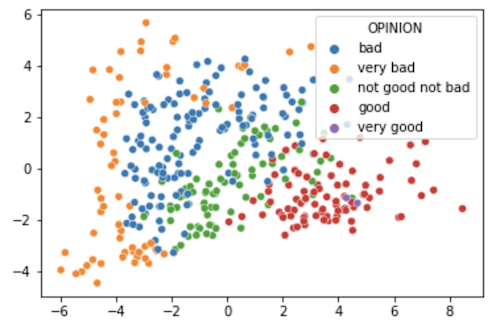

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [ ]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-2.979871,2.614537,2.885953,-1.093256,0.446893,0.422027,1.236378,-1.867595,0.358195,1.247557,0.229487,0.311361,0.282417,-0.553996,-0.108251,-0.055608,0.108640,0.038084,-0.020322,-0.054048,0.067765,-1.389418e-17
1,-2.695837,-0.063532,2.264262,-1.269339,0.061472,1.704212,0.077287,0.191445,-0.868456,-0.078018,0.193912,-1.092363,0.598465,0.203289,-0.009875,-0.265036,-0.127926,-0.094051,0.022434,0.137241,-0.055734,-6.913793e-19
2,-2.314025,0.033466,2.006965,-1.448710,0.073870,1.752541,0.312680,-0.388901,-0.606726,-0.354332,0.718550,0.048571,0.222489,-0.133128,-0.294653,-0.175607,0.117286,-0.029352,-0.038246,0.009585,0.016228,-1.225945e-17
3,-3.367631,-3.240058,2.333096,-0.841262,0.777691,0.339900,0.238163,-0.567685,0.949341,0.051708,0.684671,-0.136305,-0.225557,-0.725560,-0.246527,0.039729,0.302340,-0.012837,-0.072618,0.059794,0.037528,-9.412962e-18
4,-3.671390,-3.272882,1.977849,-0.946253,0.801887,0.366775,0.268295,-0.490423,0.820784,0.151842,0.613886,-0.089453,-0.133630,-0.441365,-0.220775,-0.004650,0.136345,-0.014049,-0.031916,0.254673,-0.033655,-1.056375e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-3.865098,3.527240,-2.561789,0.444999,-0.476753,-0.068809,-0.812177,2.332155,0.271108,0.788445,1.344014,0.462519,-0.082730,0.323772,-0.381433,0.055661,-0.482710,-0.092156,0.069841,-0.129893,-0.022039,3.083425e-18
362,-4.926436,2.679314,-3.909641,2.281753,0.109619,-1.233589,-1.559728,-0.083596,-0.696012,-0.695870,-1.489713,-0.225453,0.896275,-0.613195,-0.059511,-0.000025,-0.164011,-0.000074,-0.031776,0.050209,0.043789,1.824297e-19
363,-4.154275,0.095522,-1.315933,2.640078,-0.741728,-2.212112,-0.783306,-1.418760,-0.991096,-0.628554,-0.865897,0.069552,-0.459642,-0.131476,-0.644010,0.035086,0.150550,0.068650,0.158465,-0.083271,-0.027803,-9.279975e-19
364,-4.438493,-1.484539,-0.881221,2.377764,-1.428553,-0.837347,-0.072660,0.172770,-0.228944,-0.919287,-0.531994,-0.557402,-0.198691,0.306994,-0.140210,0.015686,0.001630,0.035461,0.063448,-0.087671,0.007797,2.906441e-19


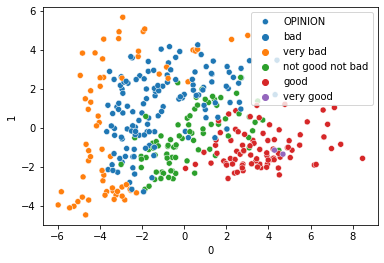

In [ ]:
sns.scatterplot(data = weather2020, x = X_pca[0], y = X_pca[1], hue = "OPINION", label = 'OPINION')
plt.legend(loc = 'upper right')

plt.show()

Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?

In [ ]:
# Classification sur X_scaled et y :

# Fit :
modelKNN = KNeighborsClassifier().fit(X_scaled, y)

In [ ]:
# Print the accuracy score on the train set and on the test set.

print("Score for X_scaled and y :", modelKNN.score(X_scaled, y))

Score for X_scaled and y : 0.8661202185792349


In [ ]:
# Fit :
modelKNN2 = KNeighborsClassifier().fit(X_pca[[0, 1]], y)

In [ ]:
# Classification KNN sur les deux premières colonnes de X_pca et y :

print("Score for X_pca and y :", modelKNN2.score(X_pca[[0, 1]], y))

Score for X_pca and y : 0.8469945355191257


Les scores sont assez proches.